*testing and trainig Of Model*

In [27]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import pickle

In [5]:
#Load the dataset
Diamond_Data_Frame = pd.read_csv("/Users/jagarlamudilahari/Downloads/DIC/DIC_Diamond_preprocessed.csv")
df = Diamond_Data_Frame.copy()
df

,carat,cut,color,clarity,table,price,x,y,z
0,0.006237,IDEAL,E,SI2,0.215686,326.0,0.031384,0.005433,0.033564
1,0.002079,PREMIUM,E,SI1,0.333333,326.0,0.022825,0.002898,0.029615
2,0.006237,GOOD,E,VS1,0.263806,327.0,0.045649,0.007063,0.029615
3,0.018711,PREMIUM,I,VS2,0.274510,334.0,0.067047,0.009960,0.040145
4,0.022869,GOOD,J,SI2,0.274510,335.0,0.087019,0.012133,0.044093
...,...,...,...,...,...,...,...,...,...
48807,0.108108,IDEAL,D,SI1,0.254902,2757.0,0.288160,0.037668,0.068773
48808,0.108108,GOOD,D,SI1,0.215686,2757.0,0.279601,0.037486,0.072392
48809,0.103950,VERY GOOD,D,SI1,0.313725,2757.0,0.275321,0.036219,0.070747
48810,0.137214,PREMIUM,H,SI2,0.274510,2757.0,0.345221,0.044187,0.076670


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48812 entries, 0 to 48811
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48812 non-null  float64
 1   cut      48812 non-null  object 
 2   color    48812 non-null  object 
 3   clarity  48812 non-null  object 
 4   table    48812 non-null  float64
 5   price    48812 non-null  float64
 6   x        48812 non-null  float64
 7   y        48812 non-null  float64
 8   z        48812 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [7]:
 df.head(25)

,carat,cut,color,clarity,table,price,x,y,z
0,0.006237,IDEAL,E,SI2,0.215686,326.0,0.031384,0.005433,0.033564
1,0.002079,PREMIUM,E,SI1,0.333333,326.0,0.022825,0.002898,0.029615
2,0.006237,GOOD,E,VS1,0.263806,327.0,0.045649,0.007063,0.029615
3,0.018711,PREMIUM,I,VS2,0.274510,334.0,0.067047,0.009960,0.040145
4,0.022869,GOOD,J,SI2,0.274510,335.0,0.087019,0.012133,0.044093
5,0.008316,VERY GOOD,J,VVS2,0.254902,336.0,0.029957,0.005071,0.035209
6,0.008316,VERY GOOD,I,VVS1,0.254902,336.0,0.031384,0.005433,0.034880
7,0.004158,FAIR,E,VS2,0.333333,337.0,0.019971,0.001811,0.035538
8,0.006237,VERY GOOD,H,VS1,0.333333,338.0,0.038516,0.006700,0.032247
9,0.020790,GOOD,J,SI1,0.215686,339.0,0.074180,0.010866,0.043435


In [8]:
df['cut'] = df['cut'].astype('category').cat.codes
df['color'] = df['color'].astype('category').cat.codes
df['clarity'] = df['clarity'].astype('category').cat.codes

In [9]:
# Comsidering 'price' column as target and extracting other columns as features from the dataframe.
X = df.drop(columns=['price'])
y = df['price']

# splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# printing shapes of X_train, X_test, y_train, y_test.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39049, 8)
(9763, 8)
(39049,)
(9763,)


In [10]:
print(X_train)

          carat  cut  color  clarity     table         x         y         z
3455   0.118503    2      4        4  0.235294  0.310984  0.041470  0.073379
19688  0.103950    4      3        3  0.254902  0.613409  0.077508  0.120105
10392  0.166320    1      5        4  0.235294  0.372325  0.047809  0.086213
5189   0.145530    2      3        2  0.235294  0.358060  0.047265  0.077657
7828   0.180873    1      1        3  0.352941  0.405136  0.053242  0.083909
...         ...  ...    ...      ...       ...       ...       ...       ...
5545   0.201663    3      2        0  0.274510  0.432240  0.055053  0.091477
6108   0.145530    3      2        2  0.313725  0.339515  0.043100  0.078973
5649   0.147609    4      5        5  0.274510  0.373752  0.046903  0.077986
23135  0.274428    3      3        4  0.313725  0.523538  0.066824  0.102336
46243  0.103950    2      3        2  0.215686  0.283880  0.037668  0.069102

[39049 rows x 8 columns]


In [11]:
print(y_train)

3455     3468.0
19688    9853.0
10392    5018.0
5189     3894.0
7828     4453.0
          ...  
5545     3984.0
6108     4103.0
5649     4008.0
23135    2399.0
46243    2335.0
Name: price, Length: 39049, dtype: float64


# **LINEAR REGRESSION**

In [12]:
# creating a Linear regression model.
model_lr= LinearRegression()

# Training the model on training dataset.
model_lr.fit(X_train, y_train)

# making predictions on test dataset.
y_pred_lr= model_lr.predict(X_test)

# Calculating evaluation metrics for Linear Regression : MSE to measure model's
# prediction accuracy and R2-score to know how well the model fits the data.
mse_lr= mean_squared_error(y_test, y_pred_lr)
r2_lr= r2_score(y_test, y_pred_lr)


# print the evaluation metrics
print("Mean Squared Error (MSE):", mse_lr)
print("R-squared (R2) Score:", r2_lr)

Mean Squared Error (MSE): 2234480.1346376566
R-squared (R2) Score: 0.6361447803958781


/var/folders/vf/rb419wks0gn80m2395h5z4y80000gn/T/ipykernel_1385/506634034.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='purple', label='Perfect Prediction')


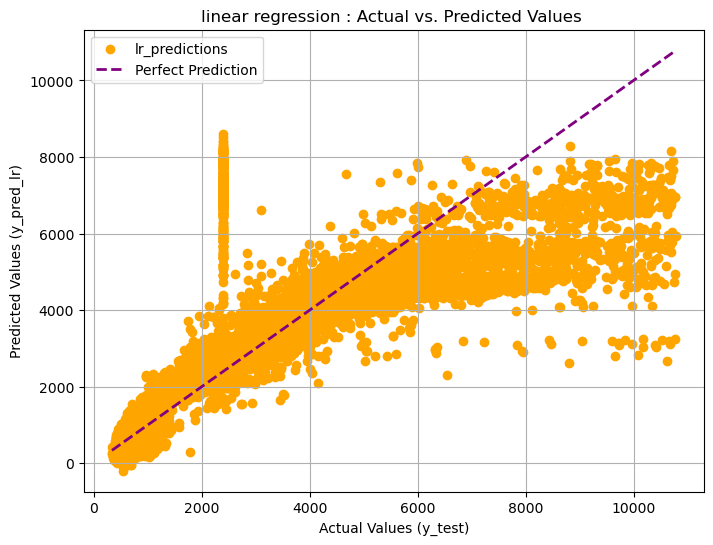

In [13]:
# Visualization graph for Linear Regression: Actual vs predicted values.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='orange', label = 'lr_predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='purple', label='Perfect Prediction')
plt.title('linear regression : Actual vs. Predicted Values ')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_lr)')
plt.legend()
plt.grid(True)
plt.show()

The plot obtained is a scatter plot for predicted and actual prices of the diamond dataset.WE can see that the model perfomrs well .But still to improve the performance we can choose different models.

# **RIDGE REGRESSION**

In [14]:
# regularization parameter to prevent over fitting.
alpha = 0.1

#creating a Ridge Regression model with above mentioned 'alpha'.
model_ridge= Ridge(alpha=alpha)

# Train the ridge regression model on training dataset.
model_ridge.fit(X_train, y_train)

# Predictions made on Test Dataset
y_pred_ridge = model_ridge.predict(X_test)

# Evaluation metrics for Ridge Regression : MSE to measure model's
# prediction accuracy and R2-score to know how well the model fits the data.
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R2) Score:", r2_ridge)


Mean Squared Error (MSE): 2234785.5314186886
R-squared (R2) Score: 0.6360950506126026


/var/folders/vf/rb419wks0gn80m2395h5z4y80000gn/T/ipykernel_1385/3761151300.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='blue', label='Perfect Prediction')


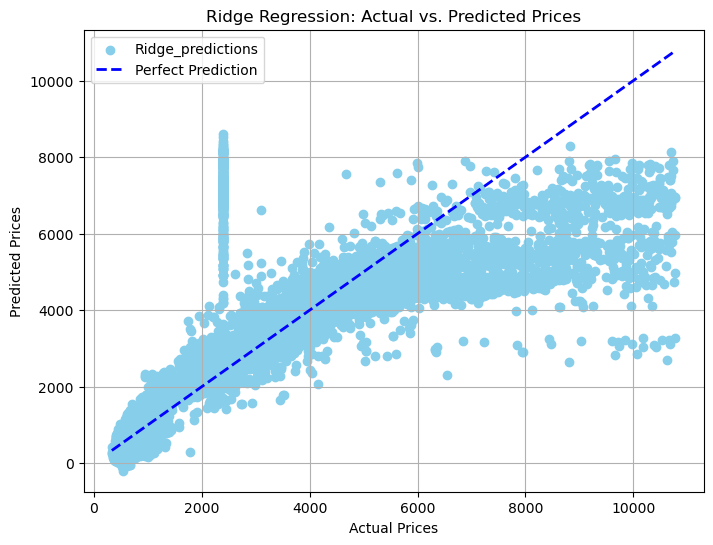

In [15]:
# Visualization graph for Ridge Regression : Actual vs predicted values.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, c='skyblue', marker='o', label='Ridge_predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='blue', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

The plot obtained by implementing Ridge regression for the Actual Prices and Predicted Prices.

# **SVM**

In [16]:
# Creating a Support Vector MAchine Regression model
svm_regressor = SVR(kernel='linear', C=300, epsilon=0.2)

# training the model with training dataset
svm_regressor.fit(X_train, y_train)

# PRedictions for test dataset
y_pred_svm = svm_regressor.predict(X_test)

# Evaluation metrics for SVM : MSE to measure model's
# prediction accuracy and R2-score to know how well the model fits the data.
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print all the evaluation metrics
print("Mean Squared Error: ", mse_svm)
print("R-squared (R2) Score: ", r2_svm)

Mean Squared Error:  2299823.291061942
R-squared (R2) Score:  0.6255045208733918


/var/folders/vf/rb419wks0gn80m2395h5z4y80000gn/T/ipykernel_1385/983491287.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='purple', label='Perfect Prediction')


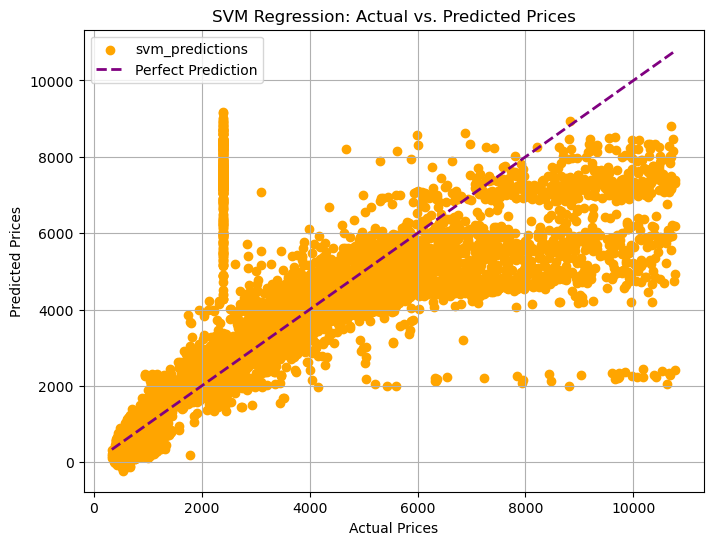

In [17]:
# Visualization graph for SVM : Actual vs predicted values.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, c='orange', marker='o', label='svm_predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='purple', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVM Regression: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

From the graph we can see that there is a slight deviation from the perdect prediction in higher ranges of price.

# **KNN**

In [18]:
# intialize variable to track best-k, best r2-score value and best MSE for better fitting of model.
best_k = None
best_r2 = -1
best_mse = float('inf')

# iterating through different K-values.
for k in range(1, 10):
    # for current k-values, building a KNN regression model
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    # calculating average R2-score by performing 5-fold Cross validation.
    cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='r2')
    avg_r2 = np.mean(cv_scores)
    # Evaluation metrics.
    mse = -np.mean(cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

    #
    if avg_r2 > best_r2:
        best_k = k
        best_r2 = avg_r2
        best_mse = mse

# Fit the best KNN model using the optimal k-value
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train, y_train)

# Predictions on testing dataset.
y_pred_knn= best_knn_regressor.predict(X_test)

# print the optimal k-values, and other evaluation metrics.
print("Best K for KNN:", best_k)
print("R-squared (R2) Score for Best KNN Model:", best_r2)
print("Mean Squared Error (MSE) for Best KNN Model:", best_mse)

Best K for KNN: 5
R-squared (R2) Score for Best KNN Model: 0.8509762230128601
Mean Squared Error (MSE) for Best KNN Model: 889277.9576185036


/var/folders/vf/rb419wks0gn80m2395h5z4y80000gn/T/ipykernel_1385/1925278943.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='blue', label='Perfect Prediction')


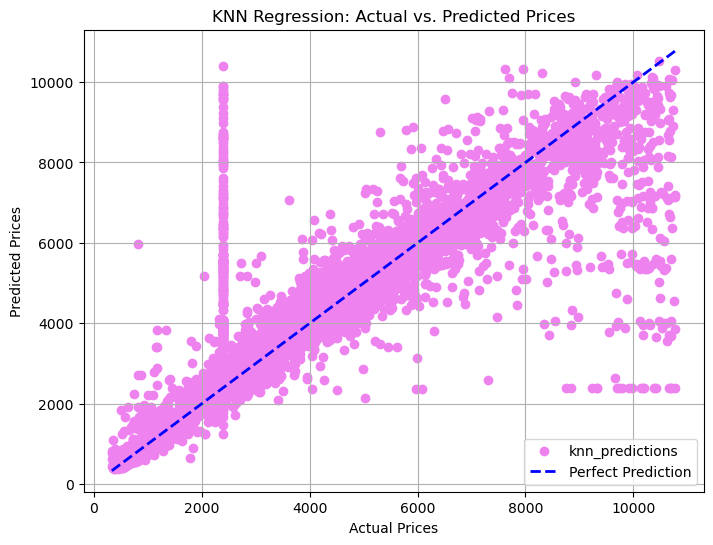

In [19]:
# Visualization graph for Knn: Actual vs predicted values.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, c='violet', marker='o', label='knn_predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='blue', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN Regression: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

# **GRADIENT BOOSTING**

In [20]:
# creating a Gradient Boosting model with 200 estimators and 0.1 as learning rate
model_gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.3, random_state=42)

# Fitting the model to the training data
model_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluation metrics for Gradient Boosting Regression : MSE to measure
# model's prediction accuracy and R2-score to know how well the model fits the data.
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R2) Score: {r2_gb}")

Mean Squared Error (MSE): 880951.1326320345
R-squared (R2) Score: 0.8565488845232865


Visualization for Gradient Boosting Model

/var/folders/vf/rb419wks0gn80m2395h5z4y80000gn/T/ipykernel_1385/300248798.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='orange', label='Perfect Prediction')


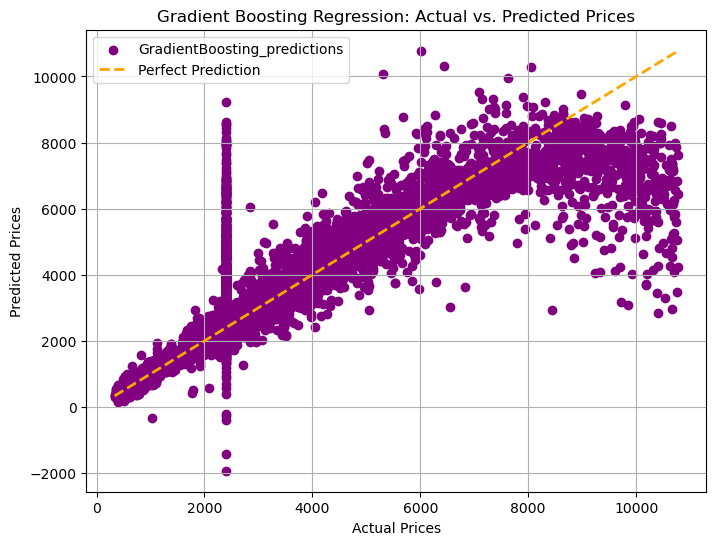

In [21]:
# Visualization graph for Gradient Boosting Regression : Actual vs predicted values.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, c='purple', marker='o', label='GradientBoosting_predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='orange', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting Regression: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

From the graph we can see that the model fits well with the actual prices of the diamond.We can see a gradual increase in prediction.

# **RANDOM FOREST**

In [22]:
# build the Random Forest model with 200 estimators.
model_rf= RandomForestRegressor(n_estimators=200, random_state=42, bootstrap= True,max_depth= 20)

# Training the model on training dataset
model_rf.fit(X_train, y_train)

# Predictions made on Testing dataset
y_pred_rf = model_rf.predict(X_test)

# Evaluation metrics for Random Forest Regression : MSE to measure model's
# prediction accuracy and R2-score to know how well the model fits the data.
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2) Score:", r2_rf)

Mean Squared Error (MSE): 682393.6165486623
R-squared (R2) Score: 0.8888813217191445


Visualization plot for Random Forest Model

/var/folders/vf/rb419wks0gn80m2395h5z4y80000gn/T/ipykernel_1385/3660551704.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red', label='Perfect Prediction')


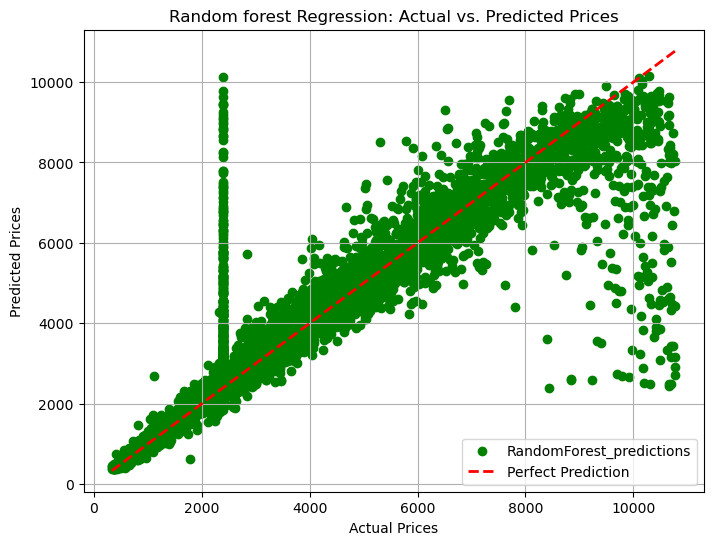

In [23]:
# Visualization graph for Random Forest Regression : Actual vs predicted values.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, c='green', marker='o', label='RandomForest_predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random forest Regression: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

From the graph we can observe that the actual prices of the diamond are almost similar to the Predicted prices.Thus this model has considered all the features and plotted a graph which fits best.

Comparision plot of R-Squared for different models

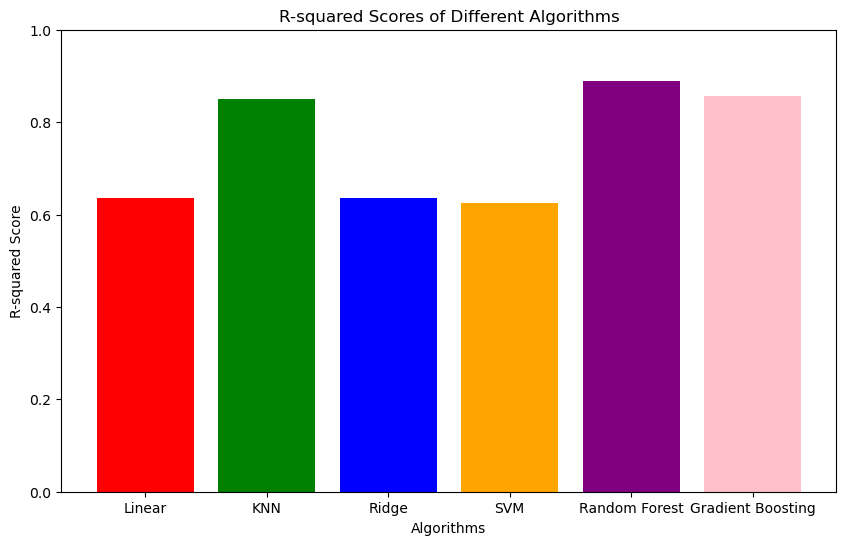

In [24]:
import matplotlib.pyplot as plt

# Example R-squared scores for different algorithms
algorithms = ['Linear', 'KNN', 'Ridge', 'SVM', 'Random Forest', 'Gradient Boosting']
r_squared_scores = [r2_lr, best_r2, r2_ridge, r2_svm, r2_rf, r2_gb]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, r_squared_scores, color=colors)
plt.xlabel('Algorithms')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Algorithms')
plt.ylim(0, 1)  # Setting y-axis limit to better visualize differences
plt.show()


The above bar graph represents the R-Squared Score of all the different models.From the graph we can see that the R-Squared Score of Random Forest Model is highest of about 0.9 .And also the KNN model is having similar range.While Linear SVM and Ridge Regression models are having lower r-Sqyared values comparitively.

Saving the model

In [25]:
import pickle
with open('model_random_forest.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

In [26]:
with open('model_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)